In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:/Users/Mridula/lung_cancer_examples.csv')

In [3]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [5]:
import seaborn as sns

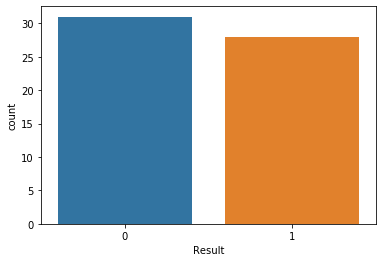

In [6]:
sns.countplot(x='Result',data=df)

## no missing values
## balanced datasheet

In [7]:
df.drop(['Name', 'Surname'], axis=1, inplace=True)

In [8]:
df

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1
5,34,0,10,0,0
6,58,15,10,0,0
7,22,12,5,2,0
8,45,2,6,0,0
9,52,18,4,5,1


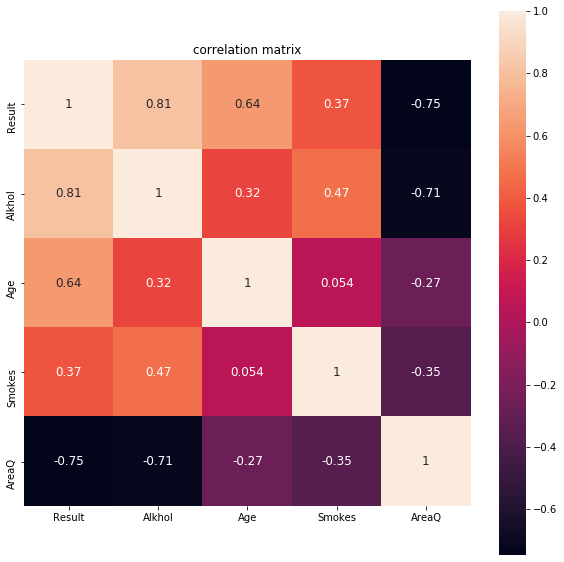

In [9]:
corrmat=df.corr()
f, ax=plt.subplots(figsize=(10,10))
cols = corrmat.nlargest(5, 'Result')['Result'].index
cm = np.corrcoef(df[cols].values.T)
heatmap=sns.heatmap(cm, annot=True, annot_kws={'size':12},square=True,fmt='.2g',  mask=None, yticklabels=cols.values,
              xticklabels=cols.values)

plt.title("correlation matrix")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X=df.drop('Result', axis=1)
y=df['Result']

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(47, 4) (12, 4) (47,) (12,)


## Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [37]:
lr.score(X_train, y_train)

0.8856169339909469

In [38]:
lr.score(X_test, y_test)

0.6819113494464941

In [39]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([ 0.3159031 , -0.39601057, -0.0367643 ,  0.9028056 , -0.01035685,
        0.25442662,  1.12439798,  0.21403636,  0.14052027, -0.05024277,
        0.98801774, -0.25314948])

## RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf=RandomForestClassifier()

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
rf.score(X_train, y_train)

1.0

In [28]:
rf.score(X_test, y_test)

0.9166666666666666

In [31]:
y_pred_rf=rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)